In [45]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [2]:
import tensorflow

In [32]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img #type: ignore

In [4]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [5]:
image_gen.flow_from_directory('./data/train')

Found 4320 images belonging to 90 classes.


In [6]:
image_gen.flow_from_directory('./data/test')

Found 1080 images belonging to 90 classes.


In [7]:
image_shape = (150,150,3)

In [8]:
from tensorflow.keras.models import Sequential #type: ignore
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D #type: ignore

In [16]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [18]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('./data/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 4320 images belonging to 90 classes.


In [19]:
test_image_gen = image_gen.flow_from_directory('./data/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 1080 images belonging to 90 classes.


In [20]:
train_image_gen.class_indices

{'antelope': 0,
 'badger': 1,
 'bat': 2,
 'bear': 3,
 'bee': 4,
 'beetle': 5,
 'bison': 6,
 'boar': 7,
 'butterfly': 8,
 'cat': 9,
 'caterpillar': 10,
 'chimpanzee': 11,
 'cockroach': 12,
 'cow': 13,
 'coyote': 14,
 'crab': 15,
 'crow': 16,
 'deer': 17,
 'dog': 18,
 'dolphin': 19,
 'donkey': 20,
 'dragonfly': 21,
 'duck': 22,
 'eagle': 23,
 'elephant': 24,
 'flamingo': 25,
 'fly': 26,
 'fox': 27,
 'goat': 28,
 'goldfish': 29,
 'goose': 30,
 'gorilla': 31,
 'grasshopper': 32,
 'hamster': 33,
 'hare': 34,
 'hedgehog': 35,
 'hippopotamus': 36,
 'hornbill': 37,
 'horse': 38,
 'hummingbird': 39,
 'hyena': 40,
 'jellyfish': 41,
 'kangaroo': 42,
 'koala': 43,
 'ladybugs': 44,
 'leopard': 45,
 'lion': 46,
 'lizard': 47,
 'lobster': 48,
 'mosquito': 49,
 'moth': 50,
 'mouse': 51,
 'octopus': 52,
 'okapi': 53,
 'orangutan': 54,
 'otter': 55,
 'owl': 56,
 'ox': 57,
 'oyster': 58,
 'panda': 59,
 'parrot': 60,
 'pelecaniformes': 61,
 'penguin': 62,
 'pig': 63,
 'pigeon': 64,
 'porcupine': 65,
 'pos

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
results = model.fit(train_image_gen,epochs=20,
                              steps_per_epoch=10,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/20
10/10 [==============================] - 11s 1s/step - loss: -634.4128 - acc: 0.0188 - val_loss: -642.1359 - val_acc: 0.0104
Epoch 2/20
10/10 [==============================] - 10s 981ms/step - loss: -706.9581 - acc: 0.0125 - val_loss: -642.1359 - val_acc: 0.0104
Epoch 3/20
10/10 [==============================] - 12s 1s/step - loss: -722.8664 - acc: 0.0125 - val_loss: -642.1359 - val_acc: 0.0104
Epoch 4/20
10/10 [==============================] - 11s 1s/step - loss: -670.9250 - acc: 0.0000e+00 - val_loss: -642.1359 - val_acc: 0.0104
Epoch 5/20
10/10 [==============================] - 11s 1s/step - loss: -710.1206 - acc: 0.0125 - val_loss: -642.1359 - val_acc: 0.0104
Epoch 6/20
10/10 [==============================] - 10s 1s/step - loss: -727.8497 - acc: 0.0125 - val_loss: -642.1359 - val_acc: 0.0104
Epoch 7/20
10/10 [==============================] - 10s 1s/step - loss: -669.5834 - acc: 0.0250 - val_loss: -642.1359 - val_acc: 0.0104
Epoch 8/20
10/10 [=======================

In [22]:
model.save('wildlife.h5')

In [24]:
results.history['accuracy']

[0.008750000037252903,
 0.00937500037252903,
 0.009166666306555271,
 0.01197916641831398,
 0.012083332985639572,
 0.01145833358168602,
 0.010833333246409893,
 0.00937500037252903,
 0.010833333246409893,
 0.010937499813735485,
 0.007916666567325592,
 0.00937500037252903,
 0.012083332985639572,
 0.010937499813735485,
 0.011250000447034836,
 0.012500000186264515,
 0.012083332985639572,
 0.00989583320915699,
 0.009583333507180214,
 0.013020833022892475,
 0.009166666306555271,
 0.010937499813735485,
 0.012916666455566883,
 0.0062500000931322575,
 0.011666666716337204,
 0.0062500000931322575,
 0.010833333246409893,
 0.01145833358168602,
 0.011250000447034836,
 0.00989583320915699,
 0.009583333507180214,
 0.01354166679084301,
 0.012500000186264515,
 0.010416666977107525,
 0.011666666716337204,
 0.01197916641831398,
 0.010416666977107525,
 0.01145833358168602,
 0.010416666977107525,
 0.01354166679084301,
 0.010833333246409893,
 0.00937500037252903,
 0.011250000447034836,
 0.01145833358168602,


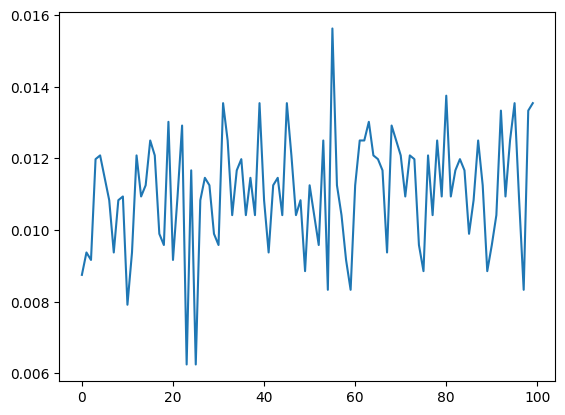

In [25]:
plt.plot(results.history['accuracy'])